In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import numpy as np

In [132]:
df = pd.read_csv("scraped_news.csv")

In [133]:
df.head()

## the description is a sumamrised version of the title 

,topic,date,text
0,"Armed conflicts and attacks,Arts and culture,D...","January 1, 2021","edit,history,watch,Sinai insurgency,\n,A ,road..."
1,"Armed conflicts and attacks,Arts and culture,D...","January 2, 2021","edit,history,watch,Insurgency in the Maghreb,\..."
2,"Armed conflicts and attacks,Disasters and acci...","January 3, 2021","edit,history,watch,Central African Republic Ci..."
3,"Armed conflicts and attacks,Health and environ...","January 4, 2021","edit,history,watch,Kivu conflict,\n,Allied Dem..."
4,"Health and environment,International relations...","January 5, 2021","edit,history,watch,COVID-19 pandemic,\n,COVID-..."


In [134]:
df.shape

(1002, 3)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   1001 non-null   object
 1   date    1002 non-null   object
 2   text    1002 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


# Data cleaning

In [136]:
print (df.isna().sum())


""" 
From these findings,
- I can drop the row with the missing topic 
- I can split the topic column by the comma delimiter
- I can remove the 'edit, history, watch' from each row


"""

topic    1
date     0
text     0
dtype: int64


" \nFrom these findings,\n- I can drop the row with the missing topic \n- I can split the topic column by the comma delimiter\n- I can remove the 'edit, history, watch' from each row\n\n\n"

In [138]:
df[df.topic.isna()]

,topic,date,text
819,NaN,"June 2, 2025","edit,history,watch"


In [130]:
# formatting the date 


df.date = pd.to_datetime(df.date)

In [131]:
df.head()

,topic,date,text
0,"Armed conflicts and attacks,Arts and culture,D...",2021-01-01,"Sinai insurgency,\n,A ,roadside bomb, kills tw..."
1,"Armed conflicts and attacks,Arts and culture,D...",2021-01-02,"Insurgency in the Maghreb,\n,2021 Tillabéri at..."
2,"Armed conflicts and attacks,Disasters and acci...",2021-01-03,"Central African Republic Civil War,\n,Rebel fo..."
3,"Armed conflicts and attacks,Health and environ...",2021-01-04,"Kivu conflict,\n,Allied Democratic Forces insu..."
4,"Health and environment,International relations...",2021-01-05,"COVID-19 pandemic,\n,COVID-19 pandemic in Euro..."


In [20]:
df[df.topic.isna()]

,topic,date,text
819,NaN,"June 2, 2025","edit,history,watch"


In [ ]:

def remove_missing_row(): 
    
    df = df.drop([819], axis=0)
    return df 



In [25]:
df

,topic,date,text
0,"Armed conflicts and attacks,Arts and culture,D...","January 1, 2021","edit,history,watch,Sinai insurgency,\n,A ,road..."
1,"Armed conflicts and attacks,Arts and culture,D...","January 2, 2021","edit,history,watch,Insurgency in the Maghreb,\..."
2,"Armed conflicts and attacks,Disasters and acci...","January 3, 2021","edit,history,watch,Central African Republic Ci..."
3,"Armed conflicts and attacks,Health and environ...","January 4, 2021","edit,history,watch,Kivu conflict,\n,Allied Dem..."
4,"Health and environment,International relations...","January 5, 2021","edit,history,watch,COVID-19 pandemic,\n,COVID-..."
...,...,...,...
997,"Armed conflicts and attacks,Business and econo...","January 31, 2025","edit,history,watch,Sudanese civil war,\n,Battl..."
998,"Armed conflicts and attacks,Disasters and acci...","March 28, 2025","edit,history,watch,Israeli invasion of Lebanon..."
999,"Armed conflicts and attacks,Disasters and acci...","March 29, 2025","edit,history,watch,Middle Eastern crisis,\n,Ga..."
1000,"Armed conflicts and attacks,Disasters and acci...","March 30, 2025","edit,history,watch,Red Sea crisis,\n,Israel, i..."


In [26]:
df.loc[0].topic

'Armed conflicts and attacks,Arts and culture,Disasters and accidents,Health and environment,International relations,Law and crime,Politics and elections'

In [28]:
df.loc[0].text

'edit,history,watch,Sinai insurgency,\n,A ,roadside bomb, kills two members of the ,Egyptian, ,Armed Forces, and injures five others near ,Bir al-Abd, in the ,North Sinai Governorate,. ,(AP),Kivu conflict,\n,Six militia members are killed during clashes between the ,Nduma Defense of Congo-Renovated, and Mai-Mai Kabido in Bukumbirwa. ,(Radio Okapi),On New Year\'s Day, ,Pope Francis, livestreams his message from the library of the Apostolic Palace. He states "the Virgin Mary’s motherly care encourages us to use our God-given time for building up the world and peace, not destroying it." In the Catholic Church, January 1 is the ,Solemnity of Mary, the Holy Mother of God,. ,(Catholic News Agency),2021 Tribistovo poisoning,\n,Eight people aged 19 die from ,carbon monoxide poisoning, in a cottage in ,Tribistovo,, ,Bosnia and Herzegovina,, during a ,New Year,\'s celebration, after ,carbon monoxide, leaks from a ,generator, used to power a heater. ,(AP),COVID-19 pandemic,\n,COVID-19 pandemic in

In [35]:
## removing the "edit, history watch" from each column 

df.text = df.text.str.replace("^edit,history,watch,", "", regex=True)


In [42]:
df

,topic,date,text
0,"Armed conflicts and attacks,Arts and culture,D...","January 1, 2021","Sinai insurgency,\n,A ,roadside bomb, kills tw..."
1,"Armed conflicts and attacks,Arts and culture,D...","January 2, 2021","Insurgency in the Maghreb,\n,2021 Tillabéri at..."
2,"Armed conflicts and attacks,Disasters and acci...","January 3, 2021","Central African Republic Civil War,\n,Rebel fo..."
3,"Armed conflicts and attacks,Health and environ...","January 4, 2021","Kivu conflict,\n,Allied Democratic Forces insu..."
4,"Health and environment,International relations...","January 5, 2021","COVID-19 pandemic,\n,COVID-19 pandemic in Euro..."
...,...,...,...
997,"Armed conflicts and attacks,Business and econo...","January 31, 2025","Sudanese civil war,\n,Battle of Khartoum,\n,20..."
998,"Armed conflicts and attacks,Disasters and acci...","March 28, 2025","Israeli invasion of Lebanon,\n,2024 Israel–Leb..."
999,"Armed conflicts and attacks,Disasters and acci...","March 29, 2025","Middle Eastern crisis,\n,Gaza war,\n,March 202..."
1000,"Armed conflicts and attacks,Disasters and acci...","March 30, 2025","Red Sea crisis,\n,Israel, intercepts a ,ballis..."


In [43]:
df.loc[1].text

'Insurgency in the Maghreb,\n,2021 Tillabéri attacks,\n,At least 79 civilians are killed and 20 others are injured when ,Islamist, ,militants, attack two villages simultaneously in ,Tillabéri,, ,Niger,, near ,the border with, ,Mali,. ,(Reuters),\n,Two ,Algerian People\'s National Army, personnel and four militants are killed during a gunfight in ,Messelmoun,, ,Algeria,. ,(Xinhua),Insurgency in Balochistan,\n,Machh attack,\n,Eleven ,Hazara, coal miners are kidnapped near their mine and then killed nearby by ,Khorasan Daesh, militants in ,Machh,, ,Pakistan,. ,(BBC News),Mali War,, ,Operation Barkhane,\n,Two ,French Army, personnel are killed when their ,armoured personnel carrier, hit a ,roadside bomb, in ,Ménaka,, ,Mali,. It is the second attack in the past few days that targeted French military personnel, the first being the December 28 ,JNIM,-claimed bombing that killed three French military personnel. ,(Al Jazeera),Somali Civil War,\n,Five people are killed, including two ,Turkish, n

In [46]:
# I need to find out what the double commas mean in the text column 
# to build my model. I need to group the topic to the text for each date 
# I will test this for the first date: January 1, 2021


first = pd.DataFrame(df.iloc[0]).T

In [47]:
first

,topic,date,text
0,"Armed conflicts and attacks,Arts and culture,D...","January 1, 2021","Sinai insurgency,\n,A ,roadside bomb, kills tw..."


In [53]:
first.text.to_clipboard()

In [155]:
df.date

AttributeError: 'DataFrame' object has no attribute 'date'

In [139]:
df.isna().sum()

topic    1
date     0
text     0
dtype: int64

In [ ]:
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

def clean_data(data): 
    
    # removing the missing row (by date) 
    data.index = pd.to_datetime(data.date) 
    
    
    # dropping the unecessary column 
    
    # removing the "edit, history, watch" 
    
    
    
    # removing the row with the missing data (June 2, 2025). I first need to identify this row. Cleaned format is year, month, day
    # I need to
    # i need to detect the rows that have missing topics or 
    
    
    row_to_remove = data[data.text == "edit,history,watch"].index
    data = data.drop(row_to_remove, axis=0)
    
    data.drop(['date'], axis=1, inplace=True)
    # 
    
    data.text = data.text.str.replace("^edit,history,watch,", "", regex=True) 
    return data 
    
    
    
def extract_topics(new_df): 
    # I can extract the topic for each row and keep the date
    # To do this, I should keep track of how many topics there are and match the number of years
    # i can use tuples to do this 
    
    new_df['topic_cleaned'] = new_df.topic.str.split(",") 

    new_df2 = new_df.drop(['text'], axis=1)
    new_df2['date'] = new_df2.index
    exploded_df = new_df2.explode('topic_cleaned')

    # Select only the date and the individual topic
    result_df = exploded_df[['date', 'topic_cleaned']].rename(columns={'topic_cleaned': 'topic'})
    print ("Result df")
    print(result_df)
    result_df = pd.DataFrame(result_df)
    result_df_grouped = result_df.groupby([result_df.index.year, result_df.index.month, result_df.topic])['topic'].count()

    result_df_grouped_df = pd.DataFrame(result_df_grouped)
    result_df_grouped_df.rename({"topic": "count"}, axis=1, inplace=True)
    # Step 1: Rename duplicate index levels (if necessary)
    result_df_grouped_df.index.set_names(['year', 'month', 'topic'], inplace=True)

    # Step 2: Reset the index
    flat_df = result_df_grouped_df.reset_index()

    # Now you have columns: 'year', 'month', 'topic', 'count'
    print(flat_df.head())
    flat_df['sep'] = '-' 

    flat_df['year_month'] = pd.concat([flat_df.year, flat_df['sep'], flat_df.month], ignore_index=True)
    flat_df['year_month'] = flat_df['year'].astype(str) + '-' + flat_df['month'].astype(str).str.zfill(2)
    flat_df.drop(['sep'], axis=1, inplace=True)
    
    return flat_df
    


def preprocess_data(data): 
    
    """ 
    The objective is to track news data over time.
    
    
    
    """
    
    pass



    
    

In [460]:
df = pd.read_csv("news_scraped.csv")
clean_df = clean_data(df)
clean_data_reshaped = extract_topics(clean_df)

Result df
                 date                        topic
date                                              
2021-01-01 2021-01-01  Armed conflicts and attacks
2021-01-01 2021-01-01             Arts and culture
2021-01-01 2021-01-01      Disasters and accidents
2021-01-01 2021-01-01       Health and environment
2021-01-01 2021-01-01      International relations
...               ...                          ...
2025-03-31 2025-03-31  Armed conflicts and attacks
2025-03-31 2025-03-31         Business and economy
2025-03-31 2025-03-31      Disasters and accidents
2025-03-31 2025-03-31      International relations
2025-03-31 2025-03-31                Law and crime

[5824 rows x 2 columns]
   year  month                        topic  count
0  2021      1  Armed conflicts and attacks     23
1  2021      1             Arts and culture      8
2  2021      1         Business and economy     13
3  2021      1      Disasters and accidents     19
4  2021      1       Health and environment    

In [492]:
clean_df

,topic,text,topic_cleaned
date,,,
2021-01-01,"Armed conflicts and attacks,Arts and culture,D...","Sinai insurgency,\n,A ,roadside bomb, kills tw...","[Armed conflicts and attacks, Arts and culture..."
2021-01-02,"Armed conflicts and attacks,Arts and culture,D...","Insurgency in the Maghreb,\n,2021 Tillabéri at...","[Armed conflicts and attacks, Arts and culture..."
2021-01-03,"Armed conflicts and attacks,Disasters and acci...","Central African Republic Civil War,\n,Rebel fo...","[Armed conflicts and attacks, Disasters and ac..."
2021-01-04,"Armed conflicts and attacks,Health and environ...","Kivu conflict,\n,Allied Democratic Forces insu...","[Armed conflicts and attacks, Health and envir..."
2021-01-05,"Health and environment,International relations...","COVID-19 pandemic,\n,COVID-19 pandemic in Euro...","[Health and environment, International relatio..."
...,...,...,...
2024-07-29,"Armed conflicts and attacks,Business and econo...","Mali War,\n,Battle of Tinzaouaten,\n,The ,Wagn...","[Armed conflicts and attacks, Business and eco..."
2024-07-30,"Armed conflicts and attacks,Business and econo...","2024 Iran–Israel conflict,, ,Israel–Hezbollah ...","[Armed conflicts and attacks, Business and eco..."
2024-07-31,"Armed conflicts and attacks,Disasters and acci...","Israel–Hamas war,\n,Assassination of Ismail Ha...","[Armed conflicts and attacks, Disasters and ac..."


In [493]:
clean_data_reshaped

,year,month,topic,count,year_month
0,2021,1,Armed conflicts and attacks,23,2021-01
1,2021,1,Arts and culture,8,2021-01
2,2021,1,Business and economy,13,2021-01
3,2021,1,Disasters and accidents,19,2021-01
4,2021,1,Health and environment,31,2021-01
...,...,...,...,...,...
354,2025,6,International relations,15,2025-06
355,2025,6,Law and crime,20,2025-06
356,2025,6,Politics and elections,16,2025-06
357,2025,6,Science and technology,6,2025-06


In [461]:
clean_data_reshaped

,year,month,topic,count,year_month
0,2021,1,Armed conflicts and attacks,23,2021-01
1,2021,1,Arts and culture,8,2021-01
2,2021,1,Business and economy,13,2021-01
3,2021,1,Disasters and accidents,19,2021-01
4,2021,1,Health and environment,31,2021-01
...,...,...,...,...,...
354,2025,6,International relations,15,2025-06
355,2025,6,Law and crime,20,2025-06
356,2025,6,Politics and elections,16,2025-06
357,2025,6,Science and technology,6,2025-06


In [473]:
len(clean_data_reshaped.topic.unique())

27

In [475]:
len(clean_data_reshaped.topic.unique())

27

In [470]:
clean_data_reshaped.month.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [472]:
assert 1== 5, 'they are not equal'

AssertionError: they are not equal

In [490]:
clean_data_reshaped['count'].dtypes

dtype('int64')

In [469]:
clean_data_reshaped.shape

(359, 5)

In [462]:
clean_data_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        359 non-null    int32 
 1   month       359 non-null    int32 
 2   topic       359 non-null    object
 3   count       359 non-null    int64 
 4   year_month  359 non-null    object
dtypes: int32(2), int64(1), object(2)
memory usage: 11.3+ KB


In [467]:
assert clean_data_reshaped.year.dtypes == 'int32'

In [ ]:
clean_data_reshaped.columns.is_

True

In [468]:
clean_data_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        359 non-null    int32 
 1   month       359 non-null    int32 
 2   topic       359 non-null    object
 3   count       359 non-null    int64 
 4   year_month  359 non-null    object
dtypes: int32(2), int64(1), object(2)
memory usage: 11.3+ KB


In [438]:
clean_df.isna().sum()

topic    1
text     0
dtype: int64

In [439]:
clean_df[clean_df.topic.isna()]

,topic,text
date,,
2025-06-27,NaN,"edit,history,watch"


# EDA

In [92]:
flat_topic_list = [item for sublist in all_topics for item in sublist]
print(flat_topic_list) 

['Armed conflicts and attacks', 'Arts and culture', 'Disasters and accidents', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Armed conflicts and attacks', 'Arts and culture', 'Disasters and accidents', 'Health and environment', 'Law and crime', 'Politics and elections', 'Armed conflicts and attacks', 'Disasters and accidents', 'Health and environment', 'International relations', 'Politics and elections', 'Armed conflicts and attacks', 'Health and environment', 'International relations', 'Law and crime', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Sports', 'Armed conflicts and attacks', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Science and technology', 'Armed conflicts and attacks', 'Business and economy', 'Health and environment', 'International relations', 'Politics and elections', 'Science and technology', 'Health and environme

In [95]:
unique_flat_topic_list = set(flat_topic_list)

In [96]:
unique_flat_topic_list

{' Disasters and accidents ',
 'Armed attacks and conflicts',
 'Armed conflicts and attacks',
 'Arts and Culture ',
 'Arts and culture',
 'Arts and culture ',
 'Attacks and armed conflicts',
 'Business and economy',
 'Businesses and economy',
 'Disasters and Accidents',
 'Disasters and accidents',
 'Entertainment',
 'Health and environment',
 'International relations',
 'Law and Crime',
 'Law and crime',
 'Other',
 'Politics and economics',
 'Politics and elections',
 "Politics and elections'",
 'Royalty',
 'Science',
 'Science and Technology',
 'Science and technology',
 'Science and technology ',
 'Sports'}

In [98]:
# I can now count how much of each topic appears in the list 

unique_flat_topic_list = list(unique_flat_topic_list)

In [99]:
unique_flat_topic_list

['Science',
 'Politics and economics',
 'Entertainment',
 'Royalty',
 'Armed conflicts and attacks',
 'Law and crime',
 'Disasters and Accidents',
 'Business and economy',
 'Politics and elections',
 'Science and technology',
 'Sports',
 ' Disasters and accidents ',
 'International relations',
 'Disasters and accidents',
 'Science and technology ',
 "Politics and elections'",
 'Businesses and economy',
 'Armed attacks and conflicts',
 'Other',
 'Law and Crime',
 'Health and environment',
 'Arts and culture',
 'Attacks and armed conflicts',
 'Arts and Culture ',
 'Arts and culture ',
 'Science and Technology']

In [127]:
# i can store this data as a tuple 

topic_count_tuple = [(topic, flat_topic_list.count(topic)) for topic in flat_topic_list]

topic_names = [topic for topic in flat_topic_list]

topic_counts = [flat_topic_list.count(topic) for topic in flat_topic_list]

In [115]:
topic_counts_df = pd.DataFrame({
    "Category": topic_names, 
    "Count": topic_counts}) 

topic_counts_df_sorted = topic_counts_df.sort_values("Category")

In [116]:
topic_counts_df_sorted

,Category,Count
5458,Disasters and accidents,1
2940,Armed attacks and conflicts,2
2937,Armed attacks and conflicts,2
0,Armed conflicts and attacks,941
2620,Armed conflicts and attacks,941
...,...,...
703,Sports,354
5218,Sports,354
3977,Sports,354
2774,Sports,354


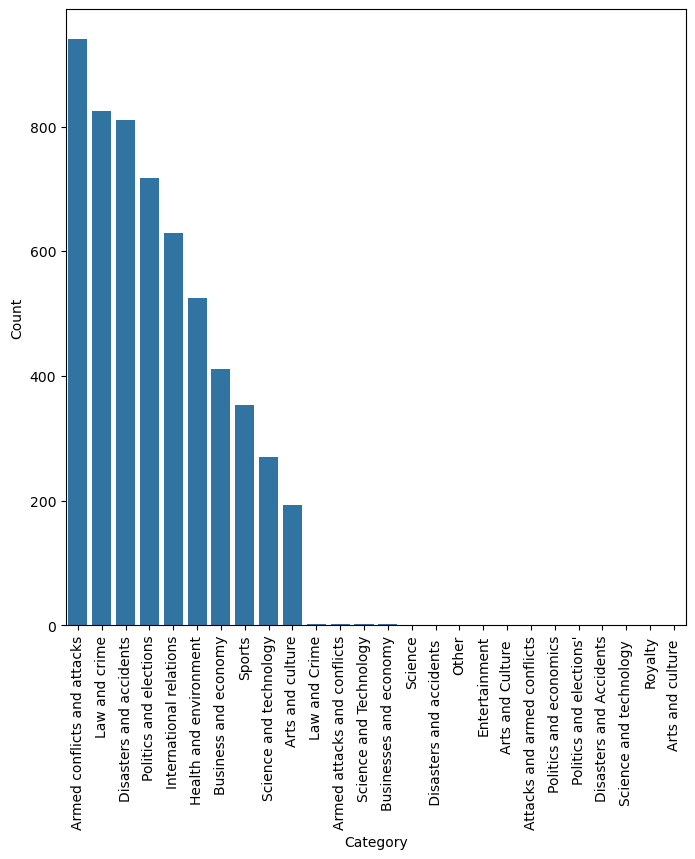

In [126]:
plt.figure(figsize=(8,8))
sns.barplot(x='Category', y='Count', data=topic_counts_df, 
            order=topic_counts_df.sort_values("Count", ascending=False).Category)


plt.xticks(rotation=90) 

plt.show()

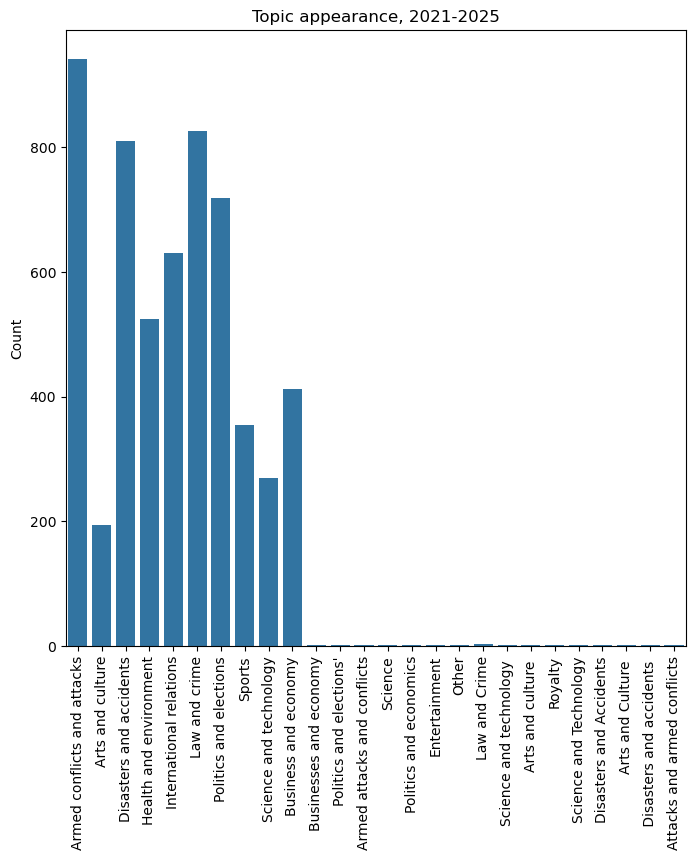

In [114]:
plt.figure(figsize=(8,8)) 

sns.barplot(x=topic_names, y=topic_counts)
plt.ylabel("Count")
# rotating the x axis labels 
plt.title("Topic appearance, 2021-2025")



plt.xticks(rotation=90)
plt.show() 

In [ ]:
""" 
I can now group the topic counts by year/month and then track how the topics change over time 

"""




In [128]:
topic_count_tuple

[('Armed conflicts and attacks', 941),
 ('Arts and culture', 194),
 ('Disasters and accidents', 810),
 ('Health and environment', 525),
 ('International relations', 630),
 ('Law and crime', 826),
 ('Politics and elections', 718),
 ('Armed conflicts and attacks', 941),
 ('Arts and culture', 194),
 ('Disasters and accidents', 810),
 ('Health and environment', 525),
 ('Law and crime', 826),
 ('Politics and elections', 718),
 ('Armed conflicts and attacks', 941),
 ('Disasters and accidents', 810),
 ('Health and environment', 525),
 ('International relations', 630),
 ('Politics and elections', 718),
 ('Armed conflicts and attacks', 941),
 ('Health and environment', 525),
 ('International relations', 630),
 ('Law and crime', 826),
 ('Health and environment', 525),
 ('International relations', 630),
 ('Law and crime', 826),
 ('Politics and elections', 718),
 ('Sports', 354),
 ('Armed conflicts and attacks', 941),
 ('Health and environment', 525),
 ('International relations', 630),
 ('Law and 

In [256]:
# using the clean_data() function 

df = pd.read_csv("scraped_news.csv") 
new_df = clean_data(df)

AttributeError: 'Series' object has no attribute 'date'

In [252]:
new_df

date
2021-01-01    ,Sinai insurgency,\n,A ,roadside bomb, kills t...
2021-01-02    ,Insurgency in the Maghreb,\n,2021 Tillabéri a...
2021-01-03    ,Central African Republic Civil War,\n,Rebel f...
2021-01-04    ,Kivu conflict,\n,Allied Democratic Forces ins...
2021-01-05    ,COVID-19 pandemic,\n,COVID-19 pandemic in Eur...
                                    ...                        
2025-01-31    ,Sudanese civil war,\n,Battle of Khartoum,\n,2...
2025-03-28    ,Israeli invasion of Lebanon,\n,2024 Israel–Le...
2025-03-29    ,Middle Eastern crisis,\n,Gaza war,\n,March 20...
2025-03-30    ,Red Sea crisis,\n,Israel, intercepts a ,balli...
2025-03-31    ,Gaza war,\n,War crimes in the Gaza war,\n,The...
Name: text, Length: 1001, dtype: object

In [239]:
new_df.columns

Index(['topic', 'date', 'text'], dtype='object')

In [243]:
new_df

,topic,date,text
date,,,
2021-01-01,"Armed conflicts and attacks,Arts and culture,D...","January 1, 2021","edit,history,watch,Sinai insurgency,\n,A ,road..."
2021-01-02,"Armed conflicts and attacks,Arts and culture,D...","January 2, 2021","edit,history,watch,Insurgency in the Maghreb,\..."
2021-01-03,"Armed conflicts and attacks,Disasters and acci...","January 3, 2021","edit,history,watch,Central African Republic Ci..."
2021-01-04,"Armed conflicts and attacks,Health and environ...","January 4, 2021","edit,history,watch,Kivu conflict,\n,Allied Dem..."
2021-01-05,"Health and environment,International relations...","January 5, 2021","edit,history,watch,COVID-19 pandemic,\n,COVID-..."
...,...,...,...
2025-01-31,"Armed conflicts and attacks,Business and econo...","January 31, 2025","edit,history,watch,Sudanese civil war,\n,Battl..."
2025-03-28,"Armed conflicts and attacks,Disasters and acci...","March 28, 2025","edit,history,watch,Israeli invasion of Lebanon..."
2025-03-29,"Armed conflicts and attacks,Disasters and acci...","March 29, 2025","edit,history,watch,Middle Eastern crisis,\n,Ga..."


In [169]:
new_df.drop(['date'], axis=1, inplace=True)

In [185]:
all_grouped = new_df.groupby([new_df.index.year]).sum()

In [188]:
new_df.topic.str.split(",")

date
2021-01-01    [Armed conflicts and attacks, Arts and culture...
2021-01-02    [Armed conflicts and attacks, Arts and culture...
2021-01-03    [Armed conflicts and attacks, Disasters and ac...
2021-01-04    [Armed conflicts and attacks, Health and envir...
2021-01-05    [Health and environment, International relatio...
                                    ...                        
2025-01-31    [Armed conflicts and attacks, Business and eco...
2025-03-28    [Armed conflicts and attacks, Disasters and ac...
2025-03-29    [Armed conflicts and attacks, Disasters and ac...
2025-03-30    [Armed conflicts and attacks, Disasters and ac...
2025-03-31    [Armed conflicts and attacks, Business and eco...
Name: topic, Length: 1002, dtype: object

In [186]:
all_grouped

,topic,text
date,,
2021,"Armed conflicts and attacks,Arts and culture,D...","edit,history,watch,Sinai insurgency,\n,A ,road..."
2022,"Armed conflicts and attacks,Disasters and acci...","edit,history,watch,Russo-Ukrainian War,\n,War ..."
2023,"Armed conflicts and attacks,Business and econo...","edit,history,watch,Russo-Ukrainian War,\n,2022..."
2024,"Armed conflicts and attacks,Arts and culture,D...","edit,history,watch,Israel–Hamas war,\n,2023 Is..."
2025,"Armed conflicts and attacks,Disasters and acci...","edit,history,watch,Gaza war,\n,Israeli invasio..."


In [192]:
new_df.groupby([new_df.index.year]).sum()

,topic,text
date,,
2021,"Armed conflicts and attacks,Arts and culture,D...","edit,history,watch,Sinai insurgency,\n,A ,road..."
2022,"Armed conflicts and attacks,Disasters and acci...","edit,history,watch,Russo-Ukrainian War,\n,War ..."
2023,"Armed conflicts and attacks,Business and econo...","edit,history,watch,Russo-Ukrainian War,\n,2022..."
2024,"Armed conflicts and attacks,Arts and culture,D...","edit,history,watch,Israel–Hamas war,\n,2023 Is..."
2025,"Armed conflicts and attacks,Disasters and acci...","edit,history,watch,Gaza war,\n,Israeli invasio..."


In [199]:
topics = group_topics(new_df)

In [217]:
all_rows = [row for row in topics]
all_rows = [*all_rows]

all_rows_flat = [item for sublist in all_rows for item in sublist]

In [218]:
all_rows_flat

['Armed conflicts and attacks',
 'Arts and culture',
 'Disasters and accidents',
 'Health and environment',
 'International relations',
 'Law and crime',
 'Politics and electionsArmed conflicts and attacks',
 'Arts and culture',
 'Disasters and accidents',
 'Health and environment',
 'Law and crime',
 'Politics and electionsArmed conflicts and attacks',
 'Disasters and accidents',
 'Health and environment',
 'International relations',
 'Politics and electionsArmed conflicts and attacks',
 'Health and environment',
 'International relations',
 'Law and crimeHealth and environment',
 'International relations',
 'Law and crime',
 'Politics and elections',
 'SportsArmed conflicts and attacks',
 'Health and environment',
 'International relations',
 'Law and crime',
 'Politics and elections',
 'Science and technologyArmed conflicts and attacks',
 'Business and economy',
 'Health and environment',
 'International relations',
 'Politics and elections',
 'Science and technologyHealth and envir

In [224]:
# I can search the list and separate the lower canse and upper case letters IF they are next to each other
import re
result = []
for item in all_rows_flat:
    split_items = re.findall(r'[A-Z][^A-Z]*', item)
    result.extend([s.strip() for s in split_items if s.strip()])

print(result)

['Armed conflicts and attacks', 'Arts and culture', 'Disasters and accidents', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Armed conflicts and attacks', 'Arts and culture', 'Disasters and accidents', 'Health and environment', 'Law and crime', 'Politics and elections', 'Armed conflicts and attacks', 'Disasters and accidents', 'Health and environment', 'International relations', 'Politics and elections', 'Armed conflicts and attacks', 'Health and environment', 'International relations', 'Law and crime', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Sports', 'Armed conflicts and attacks', 'Health and environment', 'International relations', 'Law and crime', 'Politics and elections', 'Science and technology', 'Armed conflicts and attacks', 'Business and economy', 'Health and environment', 'International relations', 'Politics and elections', 'Science and technology', 'Health and environme

In [445]:
df = pd.read_csv("scraped_news.csv")
df

new_df = clean_data(df)

In [452]:
new_df['topic_cleaned'] = new_df.topic.str.split(",") 

new_df2 = new_df.drop(['text'], axis=1)
new_df2['date'] = new_df2.index
exploded_df = new_df2.explode('topic_cleaned')

# Select only the date and the individual topic
result_df = exploded_df[['date', 'topic_cleaned']].rename(columns={'topic_cleaned': 'topic'})
print ("Result df")
print(result_df)
result_df = pd.DataFrame(result_df)
result_df_grouped = result_df.groupby([result_df.index.year, result_df.index.month, result_df.topic])['topic'].count()

result_df_grouped_df = pd.DataFrame(result_df_grouped)
result_df_grouped_df.rename({"topic": "count"}, axis=1, inplace=True)
# Step 1: Rename duplicate index levels (if necessary)
result_df_grouped_df.index.set_names(['year', 'month', 'topic'], inplace=True)

# Step 2: Reset the index
flat_df = result_df_grouped_df.reset_index()

# Now you have columns: 'year', 'month', 'topic', 'count'
print(flat_df.head())
flat_df['sep'] = '-' 

flat_df['year_month'] = pd.concat([flat_df.year, flat_df['sep'], flat_df.month], ignore_index=True)
flat_df['year_month'] = flat_df['year'].astype(str) + '-' + flat_df['month'].astype(str).str.zfill(2)
flat_df.drop(['sep'], axis=1, inplace=True)

Result df
                 date                        topic
date                                              
2021-01-01 2021-01-01  Armed conflicts and attacks
2021-01-01 2021-01-01             Arts and culture
2021-01-01 2021-01-01      Disasters and accidents
2021-01-01 2021-01-01       Health and environment
2021-01-01 2021-01-01      International relations
...               ...                          ...
2025-03-31 2025-03-31  Armed conflicts and attacks
2025-03-31 2025-03-31         Business and economy
2025-03-31 2025-03-31      Disasters and accidents
2025-03-31 2025-03-31      International relations
2025-03-31 2025-03-31                Law and crime

[5701 rows x 2 columns]
   year  month                        topic  count
0  2021      1  Armed conflicts and attacks     23
1  2021      1             Arts and culture      8
2  2021      1         Business and economy     13
3  2021      1      Disasters and accidents     19
4  2021      1       Health and environment    

<Axes: xlabel='year_month', ylabel='count'>

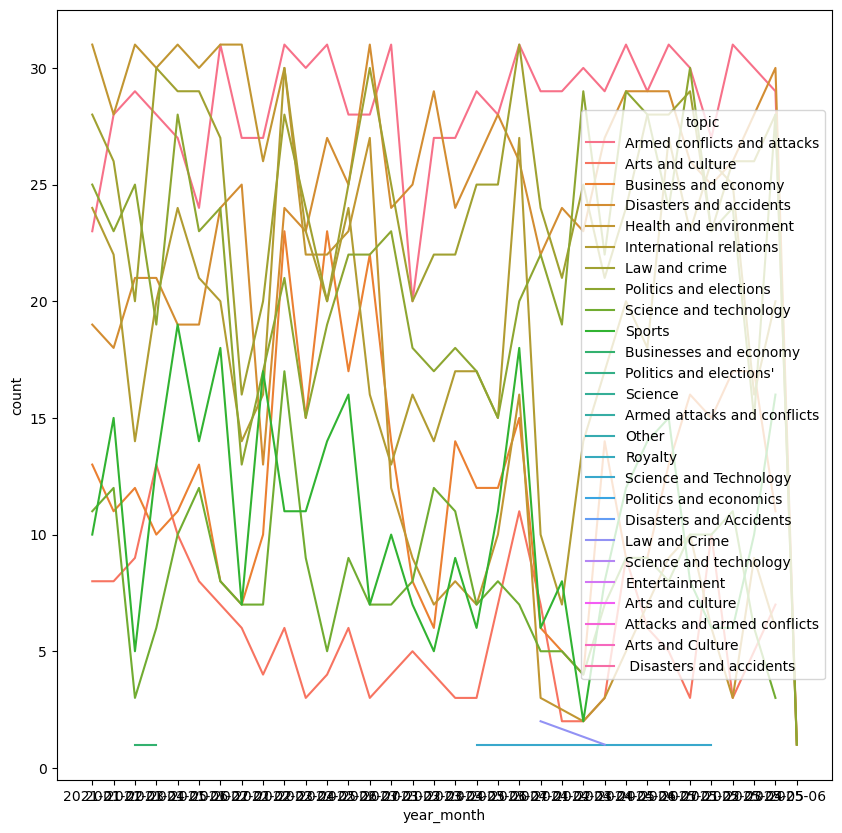

In [391]:
plt.figure(figsize=(10,10))
sns.lineplot(x='year_month', y='count', hue='topic', data=flat_df)


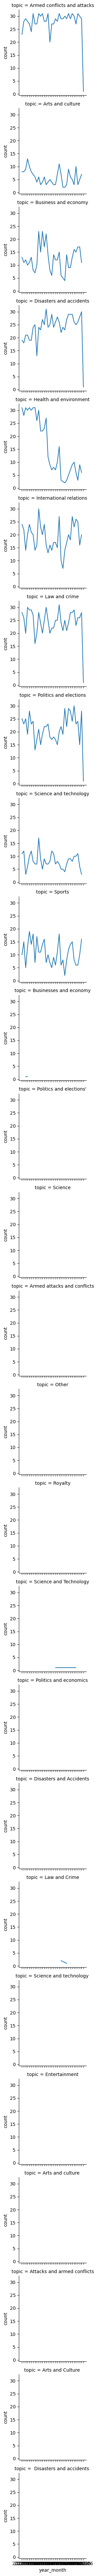

In [396]:
g = sns.FacetGrid(flat_df, row='topic')
g.map(sns.lineplot, "year_month", "count")

<Axes: xlabel='count', ylabel='topic'>

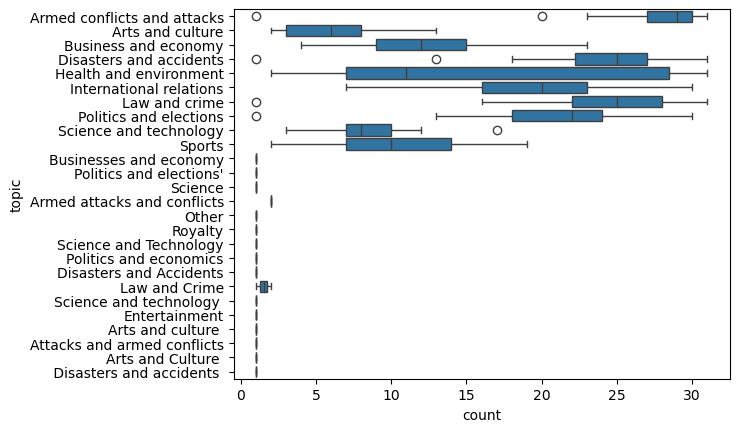

In [394]:
sns.boxplot(y='topic', x='count', data=flat_df)

In [397]:
flat_df

,year,month,topic,count,sep,year_month
0,2021,1,Armed conflicts and attacks,23,-,2021-01
1,2021,1,Arts and culture,8,-,2021-01
2,2021,1,Business and economy,13,-,2021-01
3,2021,1,Disasters and accidents,19,-,2021-01
4,2021,1,Health and environment,31,-,2021-01
...,...,...,...,...,...,...
347,2025,5,Sports,16,-,2025-05
348,2025,6,Armed conflicts and attacks,1,-,2025-06
349,2025,6,Disasters and accidents,1,-,2025-06
350,2025,6,Law and crime,1,-,2025-06


In [413]:
scrapy_news = pd.read_csv("scrapy_news.csv")

clean_news = clean_data(scrapy_news)

In [415]:
clean_news.text = clean_news.text.str.replace("^edit;,history;,watch;,", "", regex=True)

In [416]:
clean_news

,topic,text
date,,
2021-05-01,"Armed conflicts and attacks,Business and econo...","War in Afghanistan;,\n;,Afghan peace process;,..."
2021-05-02,"Armed conflicts and attacks,Health and environ...","2021 Kyrgyzstan–Tajikistan conflict;,\n;,The d..."
2021-05-03,"Armed conflicts and attacks,Arts and culture,D...","Insurgency in the Maghreb;,\n;,2021 Niger atta..."
2021-05-04,"Armed conflicts and attacks,Health and environ...","War in Afghanistan;,\n;,2021 withdrawal of U.S..."
2021-05-05,"Armed conflicts and attacks,Disasters and acci...","Syrian civil war;,\n;,Israel's role in the Syr..."
...,...,...
2025-06-23,"Armed conflicts and attacks,Law and crime,Scie...","Middle Eastern crisis;,\n;,Iran–Israel war;,\n..."
2025-06-24,"Armed conflicts and attacks,Business and econo...","Middle Eastern crisis;,\n;,Iran–Israel war;,\n..."
2025-06-25,"Armed conflicts and attacks,Business and econo...","Middle Eastern crisis;,\n;,Iran–Israel war;,\n..."


# Model Preprocessing


I plan on predicting how news reports may change over time 

I can also develop an app to collect news data

In [398]:
flat_df['topic'].unique()

array(['Armed conflicts and attacks', 'Arts and culture',
       'Business and economy', 'Disasters and accidents',
       'Health and environment', 'International relations',
       'Law and crime', 'Politics and elections',
       'Science and technology', 'Sports', 'Businesses and economy',
       "Politics and elections'", 'Science',
       'Armed attacks and conflicts', 'Other', 'Royalty',
       'Science and Technology', 'Politics and economics',
       'Disasters and Accidents', 'Law and Crime',
       'Science and technology ', 'Entertainment', 'Arts and culture ',
       'Attacks and armed conflicts', 'Arts and Culture ',
       ' Disasters and accidents '], dtype=object)

In [399]:
flat_df

,year,month,topic,count,sep,year_month
0,2021,1,Armed conflicts and attacks,23,-,2021-01
1,2021,1,Arts and culture,8,-,2021-01
2,2021,1,Business and economy,13,-,2021-01
3,2021,1,Disasters and accidents,19,-,2021-01
4,2021,1,Health and environment,31,-,2021-01
...,...,...,...,...,...,...
347,2025,5,Sports,16,-,2025-05
348,2025,6,Armed conflicts and attacks,1,-,2025-06
349,2025,6,Disasters and accidents,1,-,2025-06
350,2025,6,Law and crime,1,-,2025-06


In [400]:
new_df

,topic,text,topic_cleaned
date,,,
2021-01-01,"Armed conflicts and attacks,Arts and culture,D...","Sinai insurgency,\n,A ,roadside bomb, kills tw...","[Armed conflicts and attacks, Arts and culture..."
2021-01-02,"Armed conflicts and attacks,Arts and culture,D...","Insurgency in the Maghreb,\n,2021 Tillabéri at...","[Armed conflicts and attacks, Arts and culture..."
2021-01-03,"Armed conflicts and attacks,Disasters and acci...","Central African Republic Civil War,\n,Rebel fo...","[Armed conflicts and attacks, Disasters and ac..."
2021-01-04,"Armed conflicts and attacks,Health and environ...","Kivu conflict,\n,Allied Democratic Forces insu...","[Armed conflicts and attacks, Health and envir..."
2021-01-05,"Health and environment,International relations...","COVID-19 pandemic,\n,COVID-19 pandemic in Euro...","[Health and environment, International relatio..."
...,...,...,...
2025-01-31,"Armed conflicts and attacks,Business and econo...","Sudanese civil war,\n,Battle of Khartoum,\n,20...","[Armed conflicts and attacks, Business and eco..."
2025-03-28,"Armed conflicts and attacks,Disasters and acci...","Israeli invasion of Lebanon,\n,2024 Israel–Leb...","[Armed conflicts and attacks, Disasters and ac..."
2025-03-29,"Armed conflicts and attacks,Disasters and acci...","Middle Eastern crisis,\n,Gaza war,\n,March 202...","[Armed conflicts and attacks, Disasters and ac..."
